In [74]:
import numpy as np 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten 

The function loops over the time series data. For each time step, it creates a sequence of n_features lag observations as the input (X) and the observation at the next time step as the output (y). It appends these input-output pairs to lists X and y, respectively.

In [75]:
def prepare_data(timeseries_data, n_steps):
    X, y =[],[]
    for i in range(len(timeseries_data)):
        end_ix = i + n_steps
        if end_ix > len(timeseries_data)-1:
            break
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [76]:
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
n_steps = 3

X, y = prepare_data(timeseries_data, n_steps)

We can feed in stock price over a period of time as the input timeseries_data and make predictions in the same way.

In [77]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [78]:
print(X.shape)
print(y.shape)

(6, 3)
(6,)


In [79]:
n_features = 1 
# Reshape X to have three dimensions
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [80]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=400, verbose=1)

Epoch 1/400
1/1 [==============================] - 1s 780ms/step - loss: 31733.0254
Epoch 2/400
1/1 [==============================] - 0s 3ms/step - loss: 31395.8223
Epoch 3/400
1/1 [==============================] - 0s 3ms/step - loss: 31058.4434
Epoch 4/400
1/1 [==============================] - 0s 2ms/step - loss: 30716.5293
Epoch 5/400
1/1 [==============================] - 0s 2ms/step - loss: 30366.9746
Epoch 6/400
1/1 [==============================] - 0s 3ms/step - loss: 30006.8613
Epoch 7/400
1/1 [==============================] - 0s 3ms/step - loss: 29634.1016
Epoch 8/400
1/1 [==============================] - 0s 3ms/step - loss: 29250.7988
Epoch 9/400
1/1 [==============================] - 0s 3ms/step - loss: 28867.4355
Epoch 10/400
1/1 [==============================] - 0s 2ms/step - loss: 28475.6816
Epoch 11/400
1/1 [==============================] - 0s 2ms/step - loss: 28077.1641
Epoch 12/400
1/1 [==============================] - 0s 2ms/step - loss: 27663.5859
Epoch 13/40

Epoch 102/400
1/1 [==============================] - 0s 2ms/step - loss: 8.7484
Epoch 103/400
1/1 [==============================] - 0s 2ms/step - loss: 8.5242
Epoch 104/400
1/1 [==============================] - 0s 2ms/step - loss: 8.3706
Epoch 105/400
1/1 [==============================] - 0s 2ms/step - loss: 7.9443
Epoch 106/400
1/1 [==============================] - 0s 2ms/step - loss: 7.8393
Epoch 107/400
1/1 [==============================] - 0s 2ms/step - loss: 7.6218
Epoch 108/400
1/1 [==============================] - 0s 2ms/step - loss: 7.3106
Epoch 109/400
1/1 [==============================] - 0s 3ms/step - loss: 7.2225
Epoch 110/400
1/1 [==============================] - 0s 2ms/step - loss: 6.9917
Epoch 111/400
1/1 [==============================] - 0s 2ms/step - loss: 6.7927
Epoch 112/400
1/1 [==============================] - 0s 2ms/step - loss: 6.7096
Epoch 113/400
1/1 [==============================] - 0s 2ms/step - loss: 6.4436
Epoch 114/400
1/1 [=====================

1/1 [==============================] - 0s 2ms/step - loss: 2.7161
Epoch 205/400
1/1 [==============================] - 0s 2ms/step - loss: 2.7025
Epoch 206/400
1/1 [==============================] - 0s 2ms/step - loss: 2.6856
Epoch 207/400
1/1 [==============================] - 0s 2ms/step - loss: 2.6687
Epoch 208/400
1/1 [==============================] - 0s 2ms/step - loss: 2.6540
Epoch 209/400
1/1 [==============================] - 0s 2ms/step - loss: 2.6421
Epoch 210/400
1/1 [==============================] - 0s 2ms/step - loss: 2.6325
Epoch 211/400
1/1 [==============================] - 0s 2ms/step - loss: 2.6232
Epoch 212/400
1/1 [==============================] - 0s 2ms/step - loss: 2.6129
Epoch 213/400
1/1 [==============================] - 0s 2ms/step - loss: 2.6013
Epoch 214/400
1/1 [==============================] - 0s 2ms/step - loss: 2.5843
Epoch 215/400
1/1 [==============================] - 0s 2ms/step - loss: 2.5628
Epoch 216/400
1/1 [==============================] - 0

1/1 [==============================] - 0s 2ms/step - loss: 1.6943
Epoch 307/400
1/1 [==============================] - 0s 2ms/step - loss: 1.6687
Epoch 308/400
1/1 [==============================] - 0s 2ms/step - loss: 1.6342
Epoch 309/400
1/1 [==============================] - 0s 2ms/step - loss: 1.5918
Epoch 310/400
1/1 [==============================] - 0s 2ms/step - loss: 1.5570
Epoch 311/400
1/1 [==============================] - 0s 2ms/step - loss: 1.5320
Epoch 312/400
1/1 [==============================] - 0s 2ms/step - loss: 1.5172
Epoch 313/400
1/1 [==============================] - 0s 2ms/step - loss: 1.5242
Epoch 314/400
1/1 [==============================] - 0s 2ms/step - loss: 1.5685
Epoch 315/400
1/1 [==============================] - 0s 2ms/step - loss: 1.6859
Epoch 316/400
1/1 [==============================] - 0s 2ms/step - loss: 1.5671
Epoch 317/400
1/1 [==============================] - 0s 2ms/step - loss: 1.3839
Epoch 318/400
1/1 [==============================] - 0

In [81]:
x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[223.41078]
1 day input [196.         210.         223.41078186]
1 day output [[235.7532]]
2 day input [210.         223.41078186 235.75320435]
2 day output [[250.9254]]
3 day input [223.41078 235.7532  250.9254 ]
3 day output [[265.97577]]
4 day input [235.7532  250.9254  265.97577]
4 day output [[281.28525]]
5 day input [250.9254  265.97577 281.28525]
5 day output [[298.3072]]
6 day input [265.97577 281.28525 298.3072 ]
6 day output [[315.68225]]
7 day input [281.28525 298.3072  315.68225]
7 day output [[333.86234]]
8 day input [298.3072  315.68225 333.86234]
8 day output [[353.3317]]
9 day input [315.68225 333.86234 353.3317 ]
9 day output [[373.5421]]
[223.41078, 235.7532, 250.9254, 265.97577, 281.28525, 298.3072, 315.68225, 333.86234, 353.3317, 373.5421]


In [82]:

print(timeseries_data )
     
print(len(timeseries_data))

print(lst_output)
     

[110, 125, 133, 146, 158, 172, 187, 196, 210]
9
[223.41078, 235.7532, 250.9254, 265.97577, 281.28525, 298.3072, 315.68225, 333.86234, 353.3317, 373.5421]


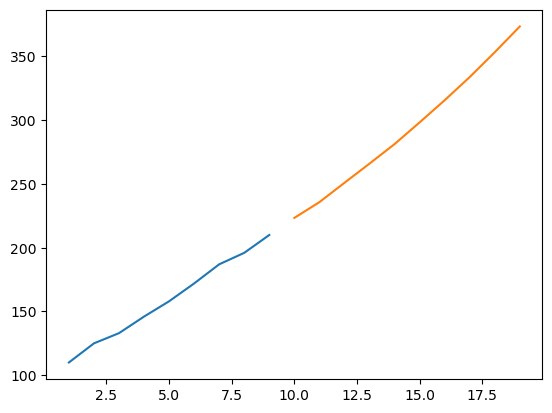

In [83]:
import matplotlib.pyplot as plt

day_new=np.arange(1,10)
day_pred=np.arange(10,20)
     

plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)

# Trying a different trend

In [84]:
timeseries_data_2 = [100, 120, 130, 140, 150, 160, 170, 180, 190, 200, 220, 230, 240, 250, 260, 270, 280, 290]
n_steps = 3

X_1, y_1 = prepare_data(timeseries_data_2, n_steps)

In [85]:
print(X_1),print(y_1)

[[100 120 130]
 [120 130 140]
 [130 140 150]
 [140 150 160]
 [150 160 170]
 [160 170 180]
 [170 180 190]
 [180 190 200]
 [190 200 220]
 [200 220 230]
 [220 230 240]
 [230 240 250]
 [240 250 260]
 [250 260 270]
 [260 270 280]]
[140 150 160 170 180 190 200 220 230 240 250 260 270 280 290]


(None, None)

In [86]:
n_features = 1 
# Reshape X to have three dimensions
X_1 = X_1.reshape((X_1.shape[0], X_1.shape[1], n_features))

In [87]:
model.fit(X_1, y_1, epochs=2000, verbose=1)

Epoch 1/2000
1/1 [==============================] - 0s 7ms/step - loss: 71.8348
Epoch 2/2000
1/1 [==============================] - 0s 4ms/step - loss: 44.6556
Epoch 3/2000
1/1 [==============================] - 0s 4ms/step - loss: 27.9333
Epoch 4/2000
1/1 [==============================] - 0s 4ms/step - loss: 32.6303
Epoch 5/2000
1/1 [==============================] - 0s 3ms/step - loss: 43.6385
Epoch 6/2000
1/1 [==============================] - 0s 3ms/step - loss: 43.7131
Epoch 7/2000
1/1 [==============================] - 0s 3ms/step - loss: 38.6074
Epoch 8/2000
1/1 [==============================] - 0s 3ms/step - loss: 34.1965
Epoch 9/2000
1/1 [==============================] - 0s 2ms/step - loss: 27.4312
Epoch 10/2000
1/1 [==============================] - 0s 2ms/step - loss: 25.1542
Epoch 11/2000
1/1 [==============================] - 0s 2ms/step - loss: 25.1454
Epoch 12/2000
1/1 [==============================] - 0s 3ms/step - loss: 25.5663
Epoch 13/2000
1/1 [==================

1/1 [==============================] - 0s 3ms/step - loss: 4.9560
Epoch 104/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.9217
Epoch 105/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.8900
Epoch 106/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.8698
Epoch 107/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.8970
Epoch 108/2000
1/1 [==============================] - 0s 3ms/step - loss: 4.8761
Epoch 109/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.8200
Epoch 110/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.6821
Epoch 111/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.6792
Epoch 112/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.7208
Epoch 113/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.5987
Epoch 114/2000
1/1 [==============================] - 0s 3ms/step - loss: 4.5209
Epoch 115/2000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 2.6740
Epoch 205/2000
1/1 [==============================] - 0s 2ms/step - loss: 2.7369
Epoch 206/2000
1/1 [==============================] - 0s 2ms/step - loss: 2.8076
Epoch 207/2000
1/1 [==============================] - 0s 2ms/step - loss: 2.6324
Epoch 208/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.5199
Epoch 209/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.6173
Epoch 210/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.5810
Epoch 211/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.4604
Epoch 212/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.5077
Epoch 213/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.5008
Epoch 214/2000
1/1 [==============================] - 0s 2ms/step - loss: 2.4132
Epoch 215/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.4436
Epoch 216/2000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 1.5174
Epoch 306/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.6869
Epoch 307/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.5517
Epoch 308/2000
1/1 [==============================] - 0s 8ms/step - loss: 1.5462
Epoch 309/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.6239
Epoch 310/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.4924
Epoch 311/2000
1/1 [==============================] - 0s 2ms/step - loss: 1.5655
Epoch 312/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.5401
Epoch 313/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.4876
Epoch 314/2000
1/1 [==============================] - 0s 2ms/step - loss: 1.5522
Epoch 315/2000
1/1 [==============================] - 0s 5ms/step - loss: 1.4836
Epoch 316/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.5041
Epoch 317/2000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 1.1938
Epoch 407/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.1892
Epoch 408/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.1844
Epoch 409/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.1795
Epoch 410/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.1746
Epoch 411/2000
1/1 [==============================] - 0s 5ms/step - loss: 1.1696
Epoch 412/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.1645
Epoch 413/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.1593
Epoch 414/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.1541
Epoch 415/2000
1/1 [==============================] - 0s 2ms/step - loss: 1.1488
Epoch 416/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.1434
Epoch 417/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.1379
Epoch 418/2000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 0.3090
Epoch 508/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.2316
Epoch 509/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.2850
Epoch 510/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1936
Epoch 511/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.2323
Epoch 512/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1680
Epoch 513/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.2141
Epoch 514/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1860
Epoch 515/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.2248
Epoch 516/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2458
Epoch 517/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3133
Epoch 518/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5129
Epoch 519/2000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.0234
Epoch 609/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0195
Epoch 610/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0169
Epoch 611/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 612/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0144
Epoch 613/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0143
Epoch 614/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0148
Epoch 615/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0156
Epoch 616/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0167
Epoch 617/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0178
Epoch 618/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0189
Epoch 619/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0202
Epoch 620/2000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.0140
Epoch 710/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0147
Epoch 711/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0158
Epoch 712/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0172
Epoch 713/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0194
Epoch 714/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0224
Epoch 715/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0273
Epoch 716/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0336
Epoch 717/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0442
Epoch 718/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0572
Epoch 719/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0797
Epoch 720/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.1033
Epoch 721/2000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.0161
Epoch 811/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0190
Epoch 812/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0228
Epoch 813/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0292
Epoch 814/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0374
Epoch 815/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0515
Epoch 816/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0680
Epoch 817/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0971
Epoch 818/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.1250
Epoch 819/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1749
Epoch 820/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2017
Epoch 821/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2514
Epoch 822/2000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 0.0078
Epoch 912/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0078
Epoch 913/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0079
Epoch 914/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0081
Epoch 915/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0084
Epoch 916/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0089
Epoch 917/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0098
Epoch 918/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0115
Epoch 919/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0142
Epoch 920/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0195
Epoch 921/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0280
Epoch 922/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0447
Epoch 923/2000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 0.0063
Epoch 1013/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0063
Epoch 1014/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0063
Epoch 1015/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0063
Epoch 1016/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0062
Epoch 1017/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0062
Epoch 1018/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 1019/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 1020/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 1021/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 1022/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 1023/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0060
Epoch 1024/2000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 1113/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0076
Epoch 1114/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 1115/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 1116/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0052
Epoch 1117/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 1118/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 1119/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0052
Epoch 1120/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 1121/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 1122/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 1123/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0062
Epoch 1124/2000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 1213/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0109
Epoch 1214/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0069
Epoch 1215/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 1216/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 1217/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 1218/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0082
Epoch 1219/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0096
Epoch 1220/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0096
Epoch 1221/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 1222/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0067
Epoch 1223/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 1224/2000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.1364
Epoch 1313/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0581
Epoch 1314/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0110
Epoch 1315/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0134
Epoch 1316/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0493
Epoch 1317/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0864
Epoch 1318/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0875
Epoch 1319/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0649
Epoch 1320/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0280
Epoch 1321/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0068
Epoch 1322/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 1323/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0257
Epoch 1324/2000
1/1 [===========

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1/1 [==============================] - 0s 2ms/step - loss: 0.0093
Epoch 1717/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0093
Epoch 1718/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0094
Epoch 1719/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0099
Epoch 1720/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0105
Epoch 1721/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0116
Epoch 1722/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0129
Epoch 1723/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0150
Epoch 1724/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0175
Epoch 1725/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0213
Epoch 1726/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0256
Epoch 1727/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0323
Epoch 1728/2000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 1817/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0051
Epoch 1818/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0095
Epoch 1819/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0147
Epoch 1820/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0200
Epoch 1821/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0252
Epoch 1822/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0294
Epoch 1823/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0334
Epoch 1824/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0353
Epoch 1825/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0373
Epoch 1826/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0371
Epoch 1827/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0376
Epoch 1828/2000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.0855
Epoch 1917/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0831
Epoch 1918/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0739
Epoch 1919/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0664
Epoch 1920/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0544
Epoch 1921/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0443
Epoch 1922/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0329
Epoch 1923/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0237
Epoch 1924/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0156
Epoch 1925/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0096
Epoch 1926/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 1927/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 1928/2000
1/1 [===========

In [88]:
x_input = np.array([300, 310, 320])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[330.53525]
1 day input [310.        320.        330.5352478]
1 day output [[340.78494]]
2 day input [320.         330.5352478  340.78494263]
2 day output [[351.165]]
3 day input [330.53525 340.78494 351.165  ]
3 day output [[361.8169]]
4 day input [340.78494 351.165   361.8169 ]
4 day output [[372.43442]]
5 day input [351.165   361.8169  372.43442]
5 day output [[383.22946]]
6 day input [361.8169  372.43442 383.22946]
6 day output [[394.2234]]
7 day input [372.43442 383.22946 394.2234 ]
7 day output [[405.3187]]
8 day input [383.22946 394.2234  405.3187 ]
8 day output [[416.6158]]
9 day input [394.2234 405.3187 416.6158]
9 day output [[428.11218]]
[330.53525, 340.78494, 351.165, 361.8169, 372.43442, 383.22946, 394.2234, 405.3187, 416.6158, 428.11218]


In [89]:
print(X_1.shape)
print(y_1.shape)

(15, 3, 1)
(15,)


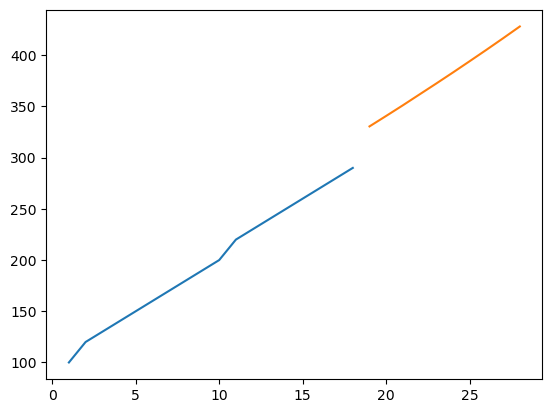

In [90]:
import matplotlib.pyplot as plt

day_new=np.arange(1,19)
day_pred=np.arange(19,29)
     

plt.plot(day_new,timeseries_data_2)
plt.plot(day_pred,lst_output)